# Steepest descent aplicado à função Rosenbrock

Este algoritmo aplica o método de otimização Steepest descent à função matemática de Rosenbrock, a qual é definida pela equação geral:

\begin{equation}
f(x,y) = (a - x)^2 + b(y - x^2)^2 ,
\end{equation}

onde $a$ e $b$ são constantes e o mínimo dessa função é $(x,y)=(a,a^2)$, onde $f(a,a^2)=0$. Normalmente $a$ e $b$ são iguais a 1 e a 100, respectivamente, nesse caso, o mínimo dessa função é $(x,y)=(1,1)$.

Então a função a ser minimizada através do método steepest descente é:

\begin{equation}
f(p_1,p_2) = 100(p_2 - p_1^2)^2 + (p_1 - 1)^2 ,
\end{equation}

A proposta do código é encontrar o mínimo da função através de muitas iterações.

O método steepest descent é um método de convergência global, o qual se aproxima do mínimo com a direção de $-\nabla \boldsymbol{\phi}(\mathbf{p})$, que é menos o gradiente da função objetivo e $\mathbf{p}$ é o vetor de parâmentros. O método possui o seguinte algoritmo:

1) estabelece um chute inicial $\mathbf{p}_i$

2) determina a direção $\mathbf{a}_i$ que diminua $\boldsymbol{\phi}$ em torno de $\mathbf{p}_i$

3) calcula $\mathbf{p}_{i+1} = \mathbf{p}_i + \rho _i \mathbf{a}_i$, onde $\rho_i$ é um escalar que modula o passo em direção ao mínimo e $\mathbf{a}_i = -\nabla \boldsymbol{\phi}(\mathbf{p})$
 
4) testa a convergência, se for satisfeita o algoritmo para, caso contrário retorna para 1)

# Importando pacotes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from visual import histeq

## Plotando a função

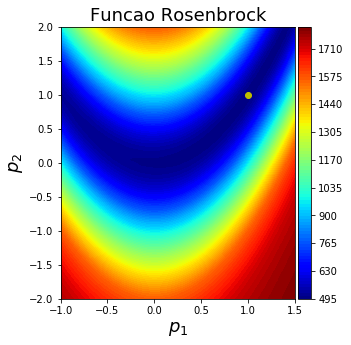

In [2]:
# numero de parametros de p1 e p2
np1 = 50
np2 = 50

#definindo os parâmetros
p1 = np.linspace(-1., 1.5, np1)
p2 = np.linspace(-2., 2., np2)

#criando um grid
p1, p2 = np.meshgrid(p1, p2)

# calculando a phi
phi = 100.*(p2 - p1*p1)*(p2 - p1*p1) + (p1 - 1.)*(p1 - 1.)

# equalizando as cores
phi_eq = histeq(phi)
phi_eq = np.reshape(phi_eq,(np1,np2))

#plot
plt.figure(figsize=(5,5))
plt.plot(1., 1., 'oy')
plt.title('Funcao Rosenbrock', fontsize=18)
plt.contourf(p1, p2, phi_eq, 100, cmap='jet')
plt.xlabel('$p_1$', fontsize=18)
plt.ylabel('$p_2$', fontsize=18)
plt.colorbar(pad=0.01, aspect=20, shrink=1)
#plt.savefig('plot_rosenbrock.png', pad_inches=0.0)
plt.show()


# Funções

In [3]:
# calculando a phi
def rosenbrock(p0):
    '''
    Calcula a função de Rosenbrock
    
    entrada
    p0: array 1D - contém duas componentes que podem ser arrays 1D
    
    output
    phi: array 1D - valor da função calculada em cada ponto (p1, p2)
    '''
    phi = 100.*(p0[1] - p0[0]*p0[0])*(p0[1] - p0[0]*p0[0]) + (p0[0] - 1.)*(p0[0] - 1.)
    
    return phi

# calculando gradiente de phi
def grad_rosenbrock(p0):
    '''
    Calcula o gradiente da função de Rosenbrock
    
    entrada
    p0: array 1D - contém duas componentes que podem ser arrays 1D
    
    output
    grad: array 1D - vetor gradiente calculado em cada ponto (p1, p2)
    '''
    grad = np.zeros(2)
    grad[0] = -400.*p0[0]*(p0[1] - p0[0]*p0[0]) + 2.*(p0[0] - 1.) 
    grad[1] = 200.*(p0[1] - p0[0]*p0[0])

    return grad

# Chute inicial e parâmetros de entrada

In [4]:
# chute inicial
p01 = -0.5
p02 = -0.5

# vetor de parâmetros
p0 = np.array([p01,p02]) 

# passo
alfa = 0.0001

#valor da função apra o chute incial
phi0 = rosenbrock(p0)

# armazenando o chute inicial
p1_list = [p01]
p2_list = [p02]
phi_list = [phi0]

# número de iteração máximo
itmax = 100000

# critério de parada
epsilon = 1e-10

# Algoritmo Steepest Descent

In [5]:
for i in range(itmax):
    # calculando o valor da função e do gradiente em p0
    grad = grad_rosenbrock(p0)
    
    # calculando p e phi
    p = p0 - alfa*grad
    phi = rosenbrock(p)
    
    # printa os valores
    print 'itreação: %3d   p1: %.2f   p2: %.2f   f: %.2e' % (i, p[0], p[1], phi)
    
    # armazenando os resultados em listas para o plot
    phi_list.append(phi)
    p1_list.append(p[0])
    p2_list.append(p[1])
     
    # critério de parada
    if abs(phi - phi0)/phi0 < epsilon:
        break
    else:
        # atualizando para a próxima iteração
        p0 = p.copy()
        phi0 = phi 

itreação:   0   p1: -0.48   p2: -0.48   f: 5.40e+01
itreação:   1   p1: -0.47   p2: -0.47   f: 5.00e+01
itreação:   2   p1: -0.46   p2: -0.46   f: 4.64e+01
itreação:   3   p1: -0.44   p2: -0.44   f: 4.32e+01
itreação:   4   p1: -0.43   p2: -0.43   f: 4.03e+01
itreação:   5   p1: -0.42   p2: -0.42   f: 3.76e+01
itreação:   6   p1: -0.41   p2: -0.41   f: 3.51e+01
itreação:   7   p1: -0.40   p2: -0.39   f: 3.29e+01
itreação:   8   p1: -0.39   p2: -0.38   f: 3.09e+01
itreação:   9   p1: -0.38   p2: -0.37   f: 2.90e+01
itreação:  10   p1: -0.38   p2: -0.36   f: 2.73e+01
itreação:  11   p1: -0.37   p2: -0.35   f: 2.57e+01
itreação:  12   p1: -0.36   p2: -0.34   f: 2.42e+01
itreação:  13   p1: -0.35   p2: -0.33   f: 2.28e+01
itreação:  14   p1: -0.35   p2: -0.32   f: 2.15e+01
itreação:  15   p1: -0.34   p2: -0.32   f: 2.04e+01
itreação:  16   p1: -0.33   p2: -0.31   f: 1.93e+01
itreação:  17   p1: -0.33   p2: -0.30   f: 1.82e+01
itreação:  18   p1: -0.32   p2: -0.29   f: 1.73e+01
itreação:  1

# Plot dos resultados

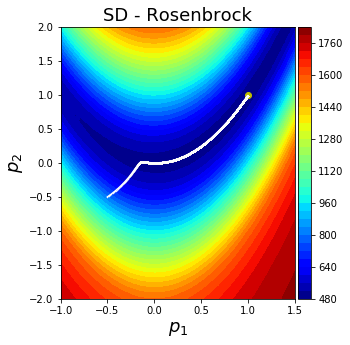

In [6]:
#plot
plt.figure(figsize=(5,5))
plt.plot(1., 1., 'oy')
plt.plot(p1_list, p2_list, '.w-', markersize=1)
plt.title('SD - Rosenbrock', fontsize=18)
plt.contourf(p1, p2, phi_eq, 40, cmap='jet')
plt.xlabel('$p_1$', fontsize=18)
plt.ylabel('$p_2$', fontsize=18)
plt.colorbar(pad=0.01, aspect=20, shrink=1)
#plt.savefig('plot_rosenbrock.png', pad_inches=0.0)
plt.show()

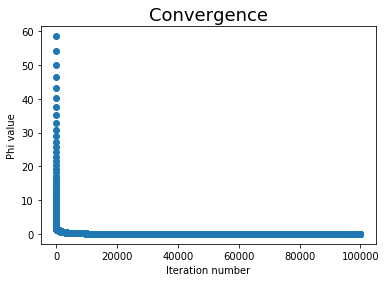

In [7]:
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
plt.ylabel('Phi value')
plt.plot(phi_list, 'o')
#plt.savefig('convergence.png', dpi=300)
plt.show()